In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import re

In [2]:
fraud = pd.read_csv('../Data/phishing_email.csv')

In [3]:
fraud = fraud.dropna()

In [7]:
RE_PATTERNS = {
    
    " are not " : ["aren't"],
    " cannot " : ["can't"],
    " cannot have ": ["can't've"],
    " because ": ["cause"],
    " could have ": ["could've"],
    " could not ": ["couldn't"],
    " could not have ": ["couldn't've"],
    " did not ": ["didn't"],
    " does not ": ["doesn't"],
    " do not ": ["don't"],
    " had not ": ["hadn't"],
    " had not have ": ["hadn't've"],
    " has not ": ["hasn't"],
    " have not ": ["haven't"],
    " he would ": ["he'd"],
    " he would have ": ["he'd've"],
    " he will ": ["he'll"],
    " he is ": ["he's"],
    " how did ": ["how'd"],
    " how will ": ["how'll"],
    " how is ": ["how's"],
    " i would ": ["i'd"],
    " i will ": ["i'll"],
    " i am ": ["i'm"],
    " i have ": ["i've"],
    " is not ": ["isn't"],
    " it would ": ["it'd"],
    " it will ": ["it'll"],
    " it is ": ["it's"],
    " let us ": ["let's"],
    " madam ": ["ma'am"],
    " may not ": ["mayn't"],
    " might have ": ["might've"],
    " might not ": ["mightn't"],
    " must have ": ["must've"],
    " must not ": ["mustn't"],
    " need not ": ["needn't"],
    " ought not ": ["oughtn't"],
    " shall not ": ["shan't"],
    " shall not ": ["sha'n't"],
    " she would ": ["she'd"],
    " she will ": ["she'll"],
    " she is ": ["she's"],
    " should have ": ["should've"],
    " should not ": ["shouldn't"],
    " that would ": ["that'd"],
    " that is ": ["that's"],
    " there had ": ["there'd"],
    " there is ": ["there's"],
    " they would ": ["they'd"],
    " they will ": ["they'll"],
    " they are ": ["they're"],
    " they have ": ["they've"],
    " was not ":[ "wasn't"],
    " we would ": ["we'd"],
    " we will ": ["we'll"],
    " we are ": ["we're"],
    " we have ": ["we've"],
    " were not ": ["weren't"],
    " what will ": ["what'll"],
    " what are ": ["what're"],
    " what is ": ["what's"],
    " what have ":[ "what've"],
    " where did ": ["where'd"],
    " where is ": ["where's"],
    " who will ": ["who'll"],
    " who is ": ["who's"],
    " will not ": ["won't"],
    " would not ": ["wouldn't"],
    " you would ": ["you'd"],
    " you will ": ["you'll"],
    " you are ": ["you're"],
    ' american ':
        [
            'amerikan'
        ],
    ' though ': ['tho'],
    #' picture ': ['pic', 'pics'],
    ' soo ': ['so'],
    ' should ':['shoulda'],
    " aint ": ["am not"],
}

In [9]:
import re 
import spacy

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def remove_stopwords(text,nlp):       
    filtered_sentence =[] 
    doc=nlp(text)
    for token in doc:
        if token.is_stop == False: 
          filtered_sentence.append(token.text)   
    return " ".join(filtered_sentence)

def clean_text(text,remove_repeat_text=True, remove_patterns_text=True, is_lower=True):
    
    if remove_patterns_text:
        for target, patterns in RE_PATTERNS.items():
            for pat in patterns:
                text=str(text).replace(pat, target)
    
    if remove_repeat_text:
        text = re.sub(r'(.)\1{2,}', r'\1', text) 

    #text = remove_stopwords(text, nlp)
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    text = re.sub(pattern, '', text)
    text = str(text).replace("\n", " ")
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r'[^\w\s]',' ',text)
    text = re.sub('[0-9]',"",text)
    text = re.sub(" +", " ", text)
    text = re.sub("([^\x00-\x7F])+"," ",text)

    if is_lower:
        text=text.lower()
        
    return text 

In [11]:
fraud['body'] = fraud['text_combined'].apply(clean_text)

In [12]:
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [14]:
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment

# apply get_sentiment function

fraud['sentiment'] = fraud['body'].apply(get_sentiment)

fraud

,text_combined,label,body,sentiment
0,hpl nom may 25 2001 see attached file hplno 52...,0,hpl nom may see attached file hplno xls hplno xls,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0,nom actual vols th forwarded sabrae zajac hou ...,1
2,enron actuals march 30 april 1 201 estimated a...,0,enron actuals march april estimated actuals ma...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0,hpl nom may see attached file hplno xls hplno xls,0
4,hpl nom june 1 2001 see attached file hplno 60...,0,hpl nom june see attached file hplno xls hplno...,0
...,...,...,...,...
82481,info advantageapartmentscom infoadvantageapart...,1,info advantageapartmentscom infoadvantageapart...,1
82482,monkeyorg helpdeskmonkeyorg monkeyorg hi josep...,1,monkeyorg helpdeskmonkeyorg monkeyorg hi josep...,0
82483,help center infohelpcentercoza_infohelpcenterc...,1,help center infohelpcentercoza_infohelpcenterc...,1
82484,metamask infosofamekarcom verify metamask wall...,1,metamask info soo famekarcom verify metamask w...,1


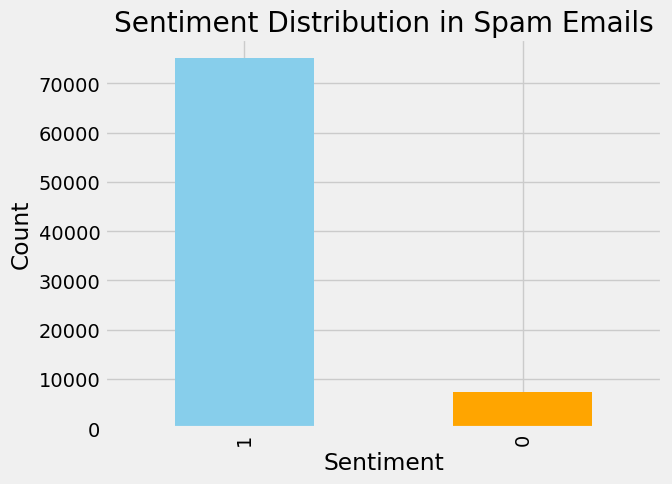

In [16]:
sentiment_counts = fraud['sentiment'].value_counts()

# Create a bar chart
sentiment_counts.plot(kind='bar', color=['skyblue', 'orange'])

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution in Spam Emails')

# Show the plot
plt.show()

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the dataset
texts = fraud['body'].tolist()  # list of text samples
labels = fraud['label'].tolist() # list of corresponding labels (0 or 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.25, random_state=42)

# Convert the text to a bag-of-words representation
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train a logistic regression classifier
classifier = LogisticRegression(max_iter = 200)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9861798079720686


In [18]:
df_test = pd.read_csv('../Data/emails.csv')
df_test['body'] = df_test['text'].apply(clean_text)
x = df_test["body"]
y = df_test["spam"]
x = vectorizer.transform(x)

In [19]:
import pickle
from sklearn import metrics 
filename = 'linear_model.sav'
pickle.dump(classifier, open(filename, 'wb')) 
  
# load the model 
load_model = pickle.load(open(filename, 'rb')) 

y_pred = load_model.predict(x) 
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.97643156424581
